# 7.8 Lab: Nonlinear Modeling

In [1]:
## Kernal: Python 3.6 ##

import pandas as pd # Import modules. #
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrix


Load dataset. 

In [2]:
df = pd.read_csv("Wage.csv") # Load file. #


In [3]:
df.head(3) # First three raws. #


year  age      sex            maritl      race        education  \
231655  2006   18  1. Male  1. Never Married  1. White     1. < HS Grad   
86582   2004   24  1. Male  1. Never Married  1. White  4. College Grad   
161300  2003   45  1. Male        2. Married  1. White  3. Some College   

                    region        jobclass          health health_ins  \
231655  2. Middle Atlantic   1. Industrial       1. <=Good      2. No   
86582   2. Middle Atlantic  2. Information  2. >=Very Good      2. No   
161300  2. Middle Atlantic   1. Industrial       1. <=Good     1. Yes   

         logwage        wage  
231655  4.318063   75.043154  
86582   4.255273   70.476020  
161300  4.875061  130.982177

In [4]:
df.info() # Data general info. #


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 231655 to 453557
Data columns (total 12 columns):
year          3000 non-null int64
age           3000 non-null int64
sex           3000 non-null object
maritl        3000 non-null object
race          3000 non-null object
education     3000 non-null object
region        3000 non-null object
jobclass      3000 non-null object
health        3000 non-null object
health_ins    3000 non-null object
logwage       3000 non-null float64
wage          3000 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 304.7+ KB


## 7.8.1 Polynomial Regression and Step Functions

When projecting polynomial regressions, we can use either orthogocal polynomial regression or raw data. 
"Using orthogonal does not change the fitted values but has the advantage that you can see whether a certain order in the polynomial significantly improves the regression over the lower orders." <br>
https://stackoverflow.com/questions/29999900/poly-in-lm-difference-between-raw-vs-orthogonal <br>
https://en.wikipedia.org/wiki/Orthogonal_polynomials <br>
(We will not go into details here.)<br>


In [5]:
X1 = PolynomialFeatures(1).fit_transform(df.age.values.reshape(-1, 1)) # Equals to "raw = T" in R, non-orthogonal.# 
X2 = PolynomialFeatures(2).fit_transform(df.age.values.reshape(-1, 1)) # PolynomialFeatures(degree = 2) #
X3 = PolynomialFeatures(3).fit_transform(df.age.values.reshape(-1, 1)) # Also rescale raw data. #
X4 = PolynomialFeatures(4).fit_transform(df.age.values.reshape(-1, 1))
X5 = PolynomialFeatures(5).fit_transform(df.age.values.reshape(-1, 1))

y = (df.wage > 250).map({False:0, True:1}).as_matrix() # map: convert variable to nominal. as_matrix: matrixing. #
print('X4:\n', X4[:5])
print('y:\n', y[:5])


X4:
 [[1.000000e+00 1.800000e+01 3.240000e+02 5.832000e+03 1.049760e+05]
 [1.000000e+00 2.400000e+01 5.760000e+02 1.382400e+04 3.317760e+05]
 [1.000000e+00 4.500000e+01 2.025000e+03 9.112500e+04 4.100625e+06]
 [1.000000e+00 4.300000e+01 1.849000e+03 7.950700e+04 3.418801e+06]
 [1.000000e+00 5.000000e+01 2.500000e+03 1.250000e+05 6.250000e+06]]
y:
 [0 0 0 0 0]


/home/shiboyao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [6]:
fit2 = sm.GLS(df.wage, X4).fit() # GLS allows us to fit polynomial regressions. X4: degree 4. #
fit2.summary().tables[1] # See the result info. #


<class 'statsmodels.iolib.table.SimpleTable'>

   The table above presents fundamental regression information. "const" is the intercept of regression function. x1(lower-case, different from X1) is the first-degree term, while x2 is the second-degree term, and so on. "coef" column presents the coefficients of all terms. P-value measures the reliability of regression coefficients. There is also a confidence interval at the end. 

   In performing a polynomial regression we must decide on the degree of the polynomial to use. One way to do this is by using hypothesis tests, which means we fit models ranging from linear to a degree-5 polynomial and seek to determine the simplest model which is sufficient to explain the relationship. For simplification, we can watch the P-value of the highest degree term in regression function. <br>

In [7]:
fit_1 = fit = sm.GLS(df.wage, X1).fit()
fit_2 = fit = sm.GLS(df.wage, X2).fit()
fit_3 = fit = sm.GLS(df.wage, X3).fit()
fit_4 = fit = sm.GLS(df.wage, X4).fit()
fit_5 = fit = sm.GLS(df.wage, X5).fit()
# print(fit_1.summary())
# print(fit_2.summary())
# print(fit_3.summary()) 
print(fit_4.summary())
# print(fit_5.summary()) # P-value failure. # 


                            GLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            GLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Mon, 17 Feb 2020   Prob (F-statistic):           2.77e-57
Time:                        16:04:31   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -184.1542     60.040     -3.067      0.0

   For example, in degree-3 regression, the P-value of x3(the cubic term) is 0.002 (<<0.05), which means degree-3 fitting might be insufficient (similarly in linear model and quadratic model), whilst in degree-5 regression, the P-values are greater than 0.05, which means the fitting fails to pass the statitical test. In degree-4 regression, the P-value of x4 is 0.051. Thus, we choose degree-4 polynomial regression. 

In [8]:
X = X4 # Use degree-4 polynomials as predictors. #


   Now we fit logistic regression on age and wage data. 

In [9]:
clf = sm.GLM(y, X, family = sm.families.Binomial(sm.families.links.logit)) # Fit logistic regression. #
res = clf.fit() # Tehe degree-4 regression model(function). #


   We use "np.arange" to generate a data sequence as test data for age and consequently get the degree-4 polynomials for prediction. 

In [10]:
age_grid = np.arange(df.age.min(), df.age.max()).reshape(-1, 1)
X_test = PolynomialFeatures(4).fit_transform(age_grid)
pred = res.predict(X_test)


Text(0,0.5,'Pr(wage > 250)|age')

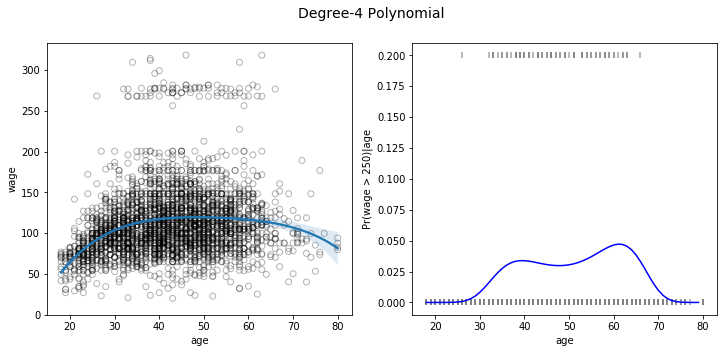

In [11]:
# Create plots. #
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
fig.suptitle('Degree-4 Polynomial', fontsize = 14)

# Scatter plot with regression curve. # Left-hand. #
ax1.scatter(df.age, df.wage, facecolor = "None", edgecolor = 'k', alpha = 0.3) # The "circles". #
sns.regplot(df.age, df.wage, order = 4, truncate = True, scatter = False, ax = ax1) # The curve. #
ax1.set_ylim(ymin = 0)

# Logistic regression shows Pr(wage>250) for the age range. # Right_hand. #
ax2.plot(age_grid, pred, color = 'b') # The curve. #

# Rug plot shows the distribution of wage>250 in training data. #
# 'True's on the top and 'False's on the bottom. #
ax2.scatter(df.age, y/5, s = 30, c = 'grey', marker = '|', alpha = 0.7) # The rug dots on the top and bottom. #

ax2.set_ylim(-0.01, 0.21)
ax2.set_xlabel('age')
ax2.set_ylabel('Pr(wage > 250)|age')



In [12]:
# Step function. #
df_cut, bins = pd.cut(df.age, 4, retbins = True, right = True)
df_cut.value_counts(sort = False) 


(17.938, 33.5]     750
(33.5, 49.0]      1399
(49.0, 64.5]       779
(64.5, 80.0]        72
Name: age, dtype: int64

   The cutpoints are automatically given by the function. We can also set our own cutpoints manually. 

In [13]:
df_steps = pd.concat([df.age, df_cut, df.wage], keys = ['age', 'age_cuts', 'wage'], axis = 1)
df_steps.head(5)


age        age_cuts        wage
231655   18  (17.938, 33.5]   75.043154
86582    24  (17.938, 33.5]   70.476020
161300   45    (33.5, 49.0]  130.982177
155159   43    (33.5, 49.0]  154.685293
11443    50    (49.0, 64.5]   75.043154

In [14]:
# Create dummy variables for the age groups. #
df_steps_dummies = pd.get_dummies(df_steps['age_cuts'])

df_steps_dummies = sm.add_constant(df_steps_dummies)
df_steps_dummies.head(5)


const  (17.938, 33.5]  (33.5, 49.0]  (49.0, 64.5]  (64.5, 80.0]
231655    1.0               1             0             0             0
86582     1.0               1             0             0             0
161300    1.0               0             1             0             0
155159    1.0               0             1             0             0
11443     1.0               0             0             1             0

   Now the age<33.5 category is left out, so the intercept coefficient of $94,160 can be interpreted as the average salary for those under 33.5 years of age, and the other coefficients can be interpreted as the average additional salary for those in the other age groups. 

In [15]:
fit3 = sm.GLM(df_steps.wage, df_steps_dummies.drop(df_steps_dummies.columns[1], axis=1)).fit()
fit3.summary().tables[1]


<class 'statsmodels.iolib.table.SimpleTable'>

In [16]:
# Put the test data in the same bins as the training data. #
bin_mapping = np.digitize(age_grid.ravel(), bins)
bin_mapping


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [17]:
X_test2 = sm.add_constant(pd.get_dummies(bin_mapping).drop(1, axis = 1))
X_test2.head()


const  2  3  4
0    1.0  0  0  0
1    1.0  0  0  0
2    1.0  0  0  0
3    1.0  0  0  0
4    1.0  0  0  0

In [18]:
# Linear regression. #
pred2 = fit3.predict(X_test2)  


In [19]:
# Logistic regression. #
clf2 = sm.GLM(y, df_steps_dummies.drop(df_steps_dummies.columns[1], axis=1),
              family=sm.families.Binomial(sm.families.links.logit))
res2 = clf2.fit()
pred3 = res2.predict(X_test2)


(-0.01, 0.21)

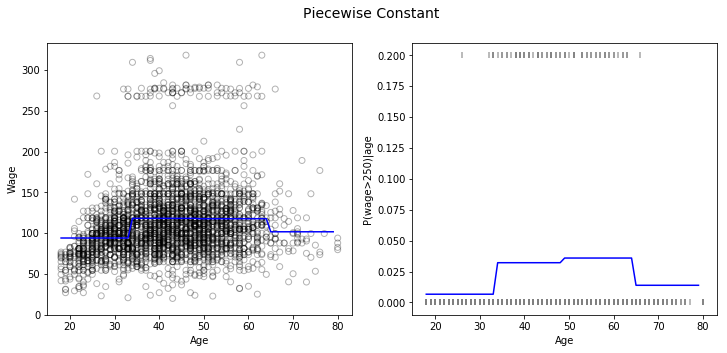

In [20]:
# Creating plots. #
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
plt.suptitle("Piecewise Constant", fontsize = 14)

# Scatter plot with polynomial curve. #
ax1.scatter(df.age, df.wage, facecolor = 'None', edgecolor = 'K', alpha = 0.3)
ax1.plot(age_grid, pred2, c = 'b')

ax1.set_xlabel('Age')
ax1.set_ylabel('Wage')
ax1.set_ylim(ymin = 0)

# Logistic regression shows P(wage > 250) for the age range. #
ax2.plot(np.arange(df.age.min(), df.age.max()).reshape(-1, 1), pred3, color = 'b')
# Rug shows the p distribution for wage > 250 in the training data. #
# 'True's on the top. 'False's on the bottom. #
ax2.scatter(df.age, y/5, s = 30, c = 'grey', marker = '|', alpha = 0.7)

ax2.set_xlabel('Age')
ax2.set_ylabel('P(wage>250)|age')
ax2.set_ylim(-0.01, 0.21)



## 7.8.2 Splines

   In Section 7.4, we saw that regression splines can be fit by constructing an appropriate matrix of basis functions. The bs(&nbsp;) function generates the entire matrix of basis functions for splines with the specified set of knots. By default, cubic bs(&nbsp;) splines are produced. Fitting wage to age using a regression spline is simple:<br>
   some useful links for projecting spline regressions in Python:<br>
   http://patsy.readthedocs.io/en/latest/spline-regression.html <br>
   https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html <br>
   https://github.com/bgrimstad/splinter/tree/master/python<br>
   

In [21]:
# Specifying 3 knots. #
transformed_x = dmatrix("bs(df.age, knots = (25,40,60), degree = 3, include_intercept = False)", 
                        {"df.age": df.age}, return_type = 'dataframe')
fit4 = sm.GLM(df.wage, transformed_x).fit()
pred4 = fit4.predict(dmatrix("bs(age_grid, knots = (25,40,60), degree = 3, include_intercept = False)",
                             {"age_grid": age_grid}, return_type = 'dataframe'))
fit4.params


Intercept                                                               60.493714
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[0]     3.980500
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[1]    44.630980
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[2]    62.838788
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[3]    55.990830
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[4]    50.688098
bs(df.age, knots=(25, 40, 60), degree=3, include_intercept=False)[5]    16.606142
dtype: float64

   Note that a cubic spline with K knots uses a total of 4 + K degrees of freedom. # 7.4.2 # 
   The most direct way to represent a cubic spline using is to start off with a basis for a cubic polynomial—namely, x, x2, x3-and then add one Truncated Power Basis function per knot. A truncated power basis function is defined as
   $$ h(x, ξ) = (x − ξ)^{3}_{+} =\left\{
      \begin{aligned}
      (x − ξ)^{3}\ \ \ if\ x>ξ \\
      0\qquad otherwise
      \end{aligned}
      \right.
   $$
   where ξ is the knot.

Here we have prespecified knots at ages 25, 40, and 60. This produces a spline with six basis functions. (Recall that a cubic spline with three knots has seven degrees of freedom; these degrees of freedom are used up by an intercept, plus six basis functions.) We could also use the df option to produce a spline with knots at uniform quantiles of the data.

In [22]:
# Specifying 6 degrees of freedom. #
transformed_x2 = dmatrix("bs(df.age, df=6, degree=3, include_intercept=False)",
                        {"df.age": df.age}, return_type='dataframe')
fit5 = sm.GLM(df.wage, transformed_x2).fit()
pred5 = fit5.predict(dmatrix("bs(age_grid, df=6, degree=3, include_intercept=False)",
                             {"age_grid": age_grid}, return_type='dataframe'))
fit5.params


Intercept                                                 56.313841
bs(df.age, df=6, degree=3, include_intercept=False)[0]    27.824002
bs(df.age, df=6, degree=3, include_intercept=False)[1]    54.062546
bs(df.age, df=6, degree=3, include_intercept=False)[2]    65.828391
bs(df.age, df=6, degree=3, include_intercept=False)[3]    55.812734
bs(df.age, df=6, degree=3, include_intercept=False)[4]    72.131473
bs(df.age, df=6, degree=3, include_intercept=False)[5]    14.750876
dtype: float64

In order to instead fit a natural spline, we specify the degree of freedom by using "df". Here we fit a natural spline with four degrees of freedom.

In [23]:
# Natrual Splines. # 
# Specifying 4 degrees of freedom. #
transformed_x3 = dmatrix("cr(df.age, df = 4)", {"df.age": df.age}, return_type = 'dataframe')
fit6 = sm.GLM(df.wage, transformed_x3).fit()
pred6 = fit6.predict(dmatrix("cr(age_grid, df = 4)", {"age_grid": age_grid}, return_type = 'dataframe'))
fit6.params


Intercept              79.642095
cr(df.age, df=4)[0]   -14.667784
cr(df.age, df=4)[1]    36.811142
cr(df.age, df=4)[2]    35.934874
cr(df.age, df=4)[3]    21.563863
dtype: float64

Text(0,0.5,'wage')

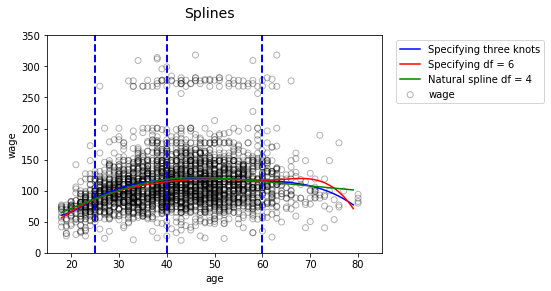

In [24]:
plt.suptitle("Splines", fontsize = 14)
plt.scatter(df.age, df.wage, facecolor = 'None', edgecolor = 'k', alpha = 0.3)
plt.plot(age_grid, pred4, color = 'b', label = 'Specifying three knots')
plt.plot(age_grid, pred5, color = 'r', label = 'Specifying df = 6')
plt.plot(age_grid, pred6, color = 'g', label = 'Natural spline df = 4')
[plt.vlines(i, 0, 350, linestyles = 'dashed', lw = 2, colors = 'b') for i in [25, 40, 60]]
plt.legend(bbox_to_anchor = (1.5, 1.0))
plt.xlim(15, 85)
plt.ylim(0, 350)
plt.xlabel('age')
plt.ylabel('wage')


Smoothing Splines<br>
No good python modules in reponse to "smooth.spline" in R yet. 


In order to perform local regression, we use the "lowess" function.


In [25]:
x = df.age.values
y = df.wage.values
fit_lor = sm.nonparametric.lowess(y, x, frac = .5) # Pay attention to the y-x relative position. #

from scipy.interpolate import interp1d

fit_lor_x = list(zip(*fit_lor))[0]
fit_lor_y = list(zip(*fit_lor))[1]

# Run scipy's interpolation. #
f = interp1d(fit_lor_x, fit_lor_y, bounds_error=False)
pred7 = f(age_grid)


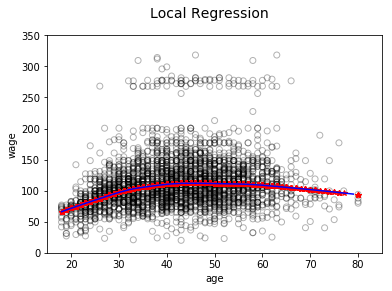

In [26]:
plt.suptitle("Local Regression", fontsize = 14)
plt.scatter(df.age, df.wage, facecolor = 'None', edgecolor = 'k', alpha = 0.3)
plt.plot(fit_lor_x, fit_lor_y, '*', color = 'r')
plt.plot(age_grid, pred7, '-', color = 'b')

plt.xlim(15, 85)
plt.ylim(0, 350)
plt.xlabel('age')
plt.ylabel('wage')

plt.show()


## 7.8.3 GAMs

https://github.com/dswah/pyGAM


100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


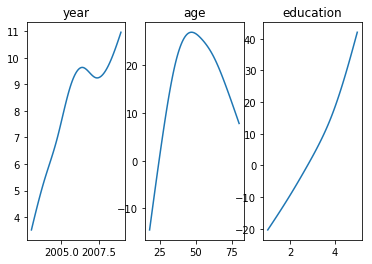

In [27]:
from pygam import LinearGAM
#from pygam.utils import generate_X_grid

X = df[['year', 'age', 'education']].values
y = df.wage.values

X[:, 2] = [test[0] for test in X[:, 2]]
X[:, 2] = [ord(t)-48 for t in X[:, 2]]

gam = LinearGAM(n_splines=10).gridsearch(X, y)
#XX = gam.generate_X_grid(term=1, meshgrid=True)

fig, axs = plt.subplots(1, 3)
titles = ['year', 'age', 'education']

for i, ax in enumerate(axs):
    #pdep, confi = gam.partial_dependence(XX, feature=i+1, width=.95)
    XX = gam.generate_X_grid(term=i, meshgrid=False)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=.95)
    
    ax.plot(XX[:, i], pdep)
#    ax.plot(XX[:, i], confi, c='r', ls='--')
    ax.set_title(titles[i])
    
#fig